<a href="https://colab.research.google.com/github/SachinSharma6174/neural_network/blob/main/MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#1. Load datasets
from sklearn.datasets import load_digits
# from sklearn.datasets import load_breast_cancer
# cancer = load_digits()
digit_data = load_digits()
X = digit_data.data
y = digit_data.target
# print(y)
# print(y)
print(X)
# data = datasets.load_covt
# print(datasets.fetch_covtype)



[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


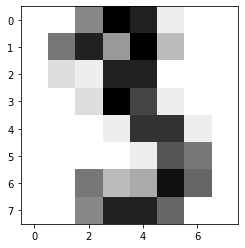

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# print(np.unique(X))
digits = load_digits()
print(np.unique(X))
print(np.unique(y))
# print(digits.DESCR)
# print(digits.data.shape)
plt.gray()
# plt.matshow(digits.images[1])
plt.imshow(digits.images[3], cmap = plt.cm.gray_r, interpolation="nearest")
plt.show()

In [20]:
# Creating train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [23]:
# Standardizing the value
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_std = standard_scaler.transform(X_train)
X_test_std =standard_scaler.transform(X_test)

In [ ]:
# Training Neural Network using Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier

perceptron = MLPClassifier(max_iter = 20, random_state = 1, verbose = True)
perceptron.fit(X_train_std, y_train)

print("activation func {}".format(perceptron.activation))
print("Predicted Classes {}".format(perceptron.classes_))
print("Training set loss Loss {}".format(perceptron.loss_))

In [27]:
# Round 2 MLP, introducing hidden nodes
n_hidden_nodes = 10
perceptron2 = MLPClassifier(activation='tanh', hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes])
perceptron2.fit(X_train_std, y_train)
print("activation func {}".format(perceptron2.activation))
print("Accuracy on Test data {}".format(perceptron2.score(X_test_std,y_test)))




activation func tanh
Accuracy on Test data 0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [28]:
from sklearn import metrics
y_predicted = perceptron2.predict(X_test_std)
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.98      0.95      0.96        42
           2       0.93      0.98      0.95        41
           3       0.91      0.94      0.92        52
           4       0.96      1.00      0.98        47
           5       0.95      0.92      0.94        39
           6       0.98      1.00      0.99        43
           7       0.98      0.96      0.97        48
           8       0.94      0.89      0.92        37
           9       0.94      0.94      0.94        48

    accuracy                           0.96       450
   macro avg       0.96      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



Text(91.68, 0.5, ' Predicted label ')

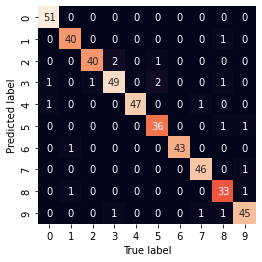

In [30]:
# Confusion Metrics 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square = True, annot = True , fmt = 'd', cbar = False)
plt.xlabel('True label')
plt.ylabel(' Predicted label ')